# Сегментация камней

### Разархивация всех данных

In [1]:
!unzip -o "/storage/vskovoroda/Stones/full_dataset.zip" -d "/storage/vskovoroda/Stones/"

Archive:  /storage/vskovoroda/Stones/full_dataset.zip
  inflating: /storage/vskovoroda/Stones/Asbest veins in the open pit conditions/parts45769.zip  
  inflating: /storage/vskovoroda/Stones/Asbest veins in the open pit conditions/part2.zip  
  inflating: /storage/vskovoroda/Stones/Asbest veins in the open pit conditions/part1.zip  
  inflating: /storage/vskovoroda/Stones/Asbest veins in the open pit conditions/part11.zip  
  inflating: /storage/vskovoroda/Stones/Asbest veins in the open pit conditions/part3.zip  


In [2]:
!mv -f "/storage/vskovoroda/Stones/Asbest veins in the open pit conditions/parts45769.zip" -t "/storage/vskovoroda/Stones/"
!mv -f "/storage/vskovoroda/Stones/Asbest veins in the open pit conditions/part2.zip" -t "/storage/vskovoroda/Stones/"
!mv -f "/storage/vskovoroda/Stones/Asbest veins in the open pit conditions/part1.zip" -t "/storage/vskovoroda/Stones/"
!mv -f "/storage/vskovoroda/Stones/Asbest veins in the open pit conditions/part11.zip" -t "/storage/vskovoroda/Stones/"
!mv -f "/storage/vskovoroda/Stones/Asbest veins in the open pit conditions/part3.zip" -t "/storage/vskovoroda/Stones/"

In [3]:
!rm -d "/storage/vskovoroda/Stones/Asbest veins in the open pit conditions"
!mkdir "/storage/vskovoroda/Stones/data/"
!mkdir "/storage/vskovoroda/Stones/data/part1"\
        "/storage/vskovoroda/Stones/data/part2"\
        "/storage/vskovoroda/Stones/data/part3"\
        "/storage/vskovoroda/Stones/data/part4"\
        "/storage/vskovoroda/Stones/data/part5"

mkdir: cannot create directory ‘/storage/vskovoroda/Stones/data/’: File exists
mkdir: cannot create directory ‘/storage/vskovoroda/Stones/data/part1’: File exists
mkdir: cannot create directory ‘/storage/vskovoroda/Stones/data/part2’: File exists
mkdir: cannot create directory ‘/storage/vskovoroda/Stones/data/part3’: File exists
mkdir: cannot create directory ‘/storage/vskovoroda/Stones/data/part4’: File exists
mkdir: cannot create directory ‘/storage/vskovoroda/Stones/data/part5’: File exists


In [21]:
!unzip -qq -o "/storage/vskovoroda/Stones/part1.zip" -d "/storage/vskovoroda/Stones/data/part1"
!unzip -qq -o "/storage/vskovoroda/Stones/part2.zip" -d "/storage/vskovoroda/Stones/data/part2"
!unzip -qq -o "/storage/vskovoroda/Stones/part3.zip" -d "/storage/vskovoroda/Stones/data/part3"
!unzip -qq -o "/storage/vskovoroda/Stones/part11.zip" -d "/storage/vskovoroda/Stones/data/part4"
!unzip -qq -o "/storage/vskovoroda/Stones/parts45769.zip" -d "/storage/vskovoroda/Stones/data/part5"

In [4]:
!rm "/storage/vskovoroda/Stones/part1.zip"
!rm "/storage/vskovoroda/Stones/part2.zip"
!rm "/storage/vskovoroda/Stones/part3.zip"
!rm "/storage/vskovoroda/Stones/part11.zip"
!rm "/storage/vskovoroda/Stones/parts45769.zip"

## Подготовка изображений

In [ ]:
from pycocotools.coco import COCO
import cv2
import os
import json
import numpy as np
import multiprocessing

In [17]:
def make_mask(image):
    global coco, part
    # if not os.path.isfile(part + '/images/' + image['file_name']):
    #     return
    ann_ids = coco.getAnnIds(
                    imgIds = image['id'], 
                    catIds = [1],  # id асбеста
                    iscrowd=None
                )
    anns = coco.loadAnns(ann_ids)
    mask = np.zeros((image['height'],image['width']))
    for ann in anns:
        mask = np.maximum(mask,coco.annToMask(ann))
    
    img = cv2.imread(part + '/images/' + image['file_name'])
    # Сохраняем изображение
    os.system('cp ' + part + '/images/' + image['file_name'] + ' images/' + image['file_name'][:-4] + '.bmp')
    
    
    img_t = cv2.blur(img, (32, 32))
    img[mask<1] = img_t[mask<1]
    
    # сохраняем blur изображение
    cv2.imwrite(start_dir + '/blur_images/' + image['file_name'][:-4] + '.bmp', img)
    
    cv2.imwrite(start_dir + '/annotations/' + image['file_name'][:-4]+'.bmp', mask) # сохраняем маску
    
    # os.system('cp ' + part + '/images/' + image['file_name'] + ' images/' + image['file_name'][:-4] + '.bmp')
    # os.replace(part + '/images/' + image['file_name'], 'images/' + image['file_name'][:-4] + '.bmp')

In [18]:
!rm -dr "/storage/vskovoroda/Stones/data/images"
!rm -dr "/storage/vskovoroda/Stones/data/blur_images"
!rm -dr "/storage/vskovoroda/Stones/data/annotations"

In [19]:
if not os.path.exists('images'):
    os.mkdir('images')
if not os.path.exists('blur_images'):
    os.mkdir('blur_images')
if not os.path.exists('annotations'):
    os.mkdir('annotations')

for part in ['part1', 'part2', 'part3', 'part4', 'part5']:
    print(part, 'Start')
    ann_file = start_dir + part + '/annotations/instances_default.json'
    coco = COCO(ann_file)
    pool_obj = multiprocessing.Pool()
    pool_obj.map(make_mask, list(coco.imgs.values()))
    print(part, 'Done!')

part1 Start
loading annotations into memory...
Done (t=0.34s)
creating index...
index created!
part1 Done!
part2 Start
loading annotations into memory...
Done (t=0.55s)
creating index...
index created!
part2 Done!
part3 Start
loading annotations into memory...
Done (t=0.92s)
creating index...
index created!
part3 Done!
part4 Start
loading annotations into memory...
Done (t=0.82s)
creating index...
index created!
part4 Done!
part5 Start
loading annotations into memory...
Done (t=0.56s)
creating index...
index created!
part5 Done!


## Импорт всех необходимых библиотек

In [1]:
from fastai.vision.all import *
import warnings
import numpy as np
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt
import segmentation_models_pytorch as smp
%matplotlib inline

In [7]:
!which python3.

/usr/bin/python3.7


In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [3]:
start_dir = "/storage/vskovoroda/Stones/data/"
os.chdir(start_dir)

In [4]:
os.listdir()

['part3',
 'runs',
 'part5',
 'history.csv',
 'Unet++_resnet152.csv',
 'part4',
 'part2',
 'blur_images',
 'annotations',
 'models',
 'images',
 'part1']

## Создаине DataBlock для обучения моделей

In [5]:
kf = KFold(n_splits=5, shuffle=True)

In [6]:
data_path = Path('/storage/vskovoroda/Stones/data')
for train_idx, val_idx in kf.split(get_image_files(data_path/'images')):
    dblock = DataBlock(blocks=(ImageBlock(PILImage), MaskBlock(codes=['no_asbest','asbest'])),
                   splitter=IndexSplitter(val_idx),
                   get_y=lambda o: data_path/'annotations'/o.name,
                   item_tfms=[Resize(1000), RandomCrop(256)],
                   batch_tfms=[Normalize.from_stats(*imagenet_stats), 
                                *aug_transforms(
                                    mult=1.0,
                                    do_flip=True,
                                    flip_vert=True,
                                    max_rotate=45.0,
                                    max_lighting=0.0,
                                    max_warp=0.0,
                                    p_affine=0.8,
                                    max_zoom = 1.0,
                                    pad_mode=PadMode.Reflection
                    )])
    dls = SegmentationDataLoaders.from_dblock(dblock,
                                    get_image_files(data_path/'images'),
                                    path=data_path,
                                    bs = 10)
    break

ValueError: not enough values to unpack (expected 3, got 2)

In [7]:
model = smp.UnetPlusPlus(
    encoder_name="resnet152", 
    encoder_weights=None,    
    in_channels=3,
    activation = 'sigmoid',       
    classes=1,
)
None

In [8]:
class BCEnDiceLoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        __name__ = 'BCE_Dice'
        super(BCEnDiceLoss, self).__init__()
    
    def forward(self, inputs, targets, smooth=0.0):
        
        #comment out if your model contains a sigmoid or equivalent activation layer
        # inputs = F.sigmoid(inputs)
        
        inputs = inputs.view(-1)
        targets = targets.view(-1).to(torch.float32)
        
        intersection = (inputs * targets).sum()
        dice = 1 - (2.*intersection + smooth)/(inputs.sum() + targets.sum() + smooth) 
        bse = F.binary_cross_entropy(inputs, targets)
        return bse*.5 + dice*.5

In [11]:
learn = Learner(dls, model, loss_func=BCEnDiceLoss(),
            metrics=[smp.losses.JaccardLoss(mode='binary'),
                     smp.losses.FocalLoss(mode='binary'),
                     smp.losses.LovaszLoss(mode='binary'),
                     smp.losses.MCCLoss()
                    ],
                cbs = [EarlyStoppingCallback(patience=4),
                       SaveModelCallback(monitor='valid_loss', fname = 'Unet++_resnet152'),
                       ])

In [12]:
with learn.no_bar():
    learn.fit(50)

[0, 0.5321635603904724, 0.5177808403968811, 0.9322008490562439, 0.17726056277751923, 1.0879408121109009, 0.9967707395553589, '00:48']
Better model found at epoch 0 with valid_loss value: 0.5177808403968811.
[1, 0.5164650082588196, 0.5447103381156921, 0.9319813847541809, 0.18857552111148834, 1.6839368343353271, 0.9740216732025146, '00:47']
[2, 0.5089327096939087, 0.49699515104293823, 0.9317586421966553, 0.17942924797534943, 1.584747552871704, 0.9392940402030945, '00:46']
Better model found at epoch 2 with valid_loss value: 0.49699515104293823.
[3, 0.5102782249450684, 0.5076096653938293, 0.9320945143699646, 0.1750980168581009, 1.3010876178741455, 0.969106137752533, '00:47']
[4, 0.508201003074646, 0.4873846471309662, 0.9317444562911987, 0.17748293280601501, 1.5008816719055176, 0.9257537722587585, '00:48']
Better model found at epoch 4 with valid_loss value: 0.4873846471309662.
[5, 0.5018125176429749, 0.49234598875045776, 0.9319580793380737, 0.17455986142158508, 1.3323405981063843, 0.93684

In [19]:
learn.validate()

(#5) [0.4873846471309662,0.9317444562911987,0.17748293280601501,1.5008816719055176,0.9257537722587585]

In [15]:
del learn

In [23]:
learn.load('Unet++')

In [16]:
learn = Learner(dls, model, loss_func=BCEnDiceLoss(),
            metrics=[smp.losses.JaccardLoss(mode='binary'),
                     smp.losses.FocalLoss(mode='binary'),
                     smp.losses.LovaszLoss(mode='binary'),
                     smp.losses.MCCLoss()
                    ])

In [27]:
# learn.load('UnetPlusPlus')

In [18]:
with torch.no_grad():
    torch.cuda.empty_cache()

In [29]:
model = smp.MAnet(
    encoder_name="resnet34", 
    encoder_weights=None,    
    in_channels=3,           
    classes=1,                
)

In [30]:
learn = Learner(dls, model, loss_func=DiceLoss())

In [31]:
learn.fit(10)

epoch,train_loss,valid_loss,time
0,0.034878,0.048845,00:29
1,0.032128,0.048845,00:29
2,0.035565,0.048845,00:29
3,0.026713,0.048845,00:29
4,0.024509,0.048845,00:29
5,0.029303,0.048845,00:29
6,0.042682,0.048845,00:29
7,0.029537,0.048845,00:28
8,0.027735,0.048845,00:29
9,0.024156,0.048845,00:29


In [ ]:
#########################################

In [24]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,time
0,0.002813,0.002470,15:59


epoch,train_loss,valid_loss,time
0,0.002545,0.002470,16:00
1,0.002240,0.002470,15:59


In [16]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,None,None,None,None,None,time
0,0.031882,0.048845,0.982975,0.991247,0.414572,1.889419,0.999907,02:30


In [ ]:
resnet152 - 58
densenet161 - 26
xception - 22
inceptionv4 - 41
vgg19_bn - 20
efficientnet-b7 - 63
dpn131 - 76
mit_b5 - 81
mobileone_s4 - 13.6

In [ ]:
smp.Unet
smp.UnetPlusPlus
smp.MAnet
smp.Linknet
smp.PSPNet
smp.FPN
smp.PAN
smp.DeepLabV3
smp.DeepLabV3Plus

In [17]:
interp = SegmentationInterpretation.from_learner(learn)

In [18]:
interp.plot_top_losses(k=5)

RuntimeError: selected index k out of range

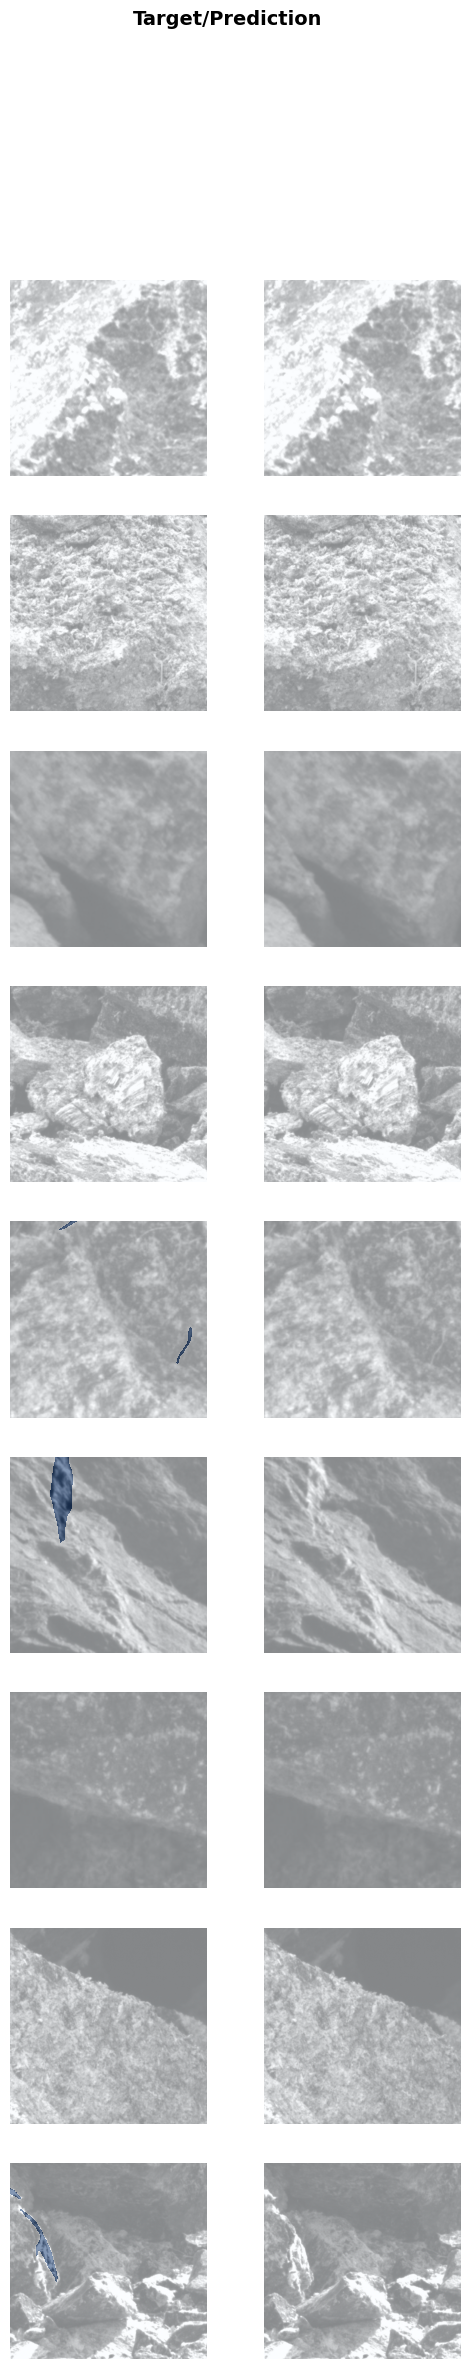

In [23]:
learn.show_results(cmap='Blues', vmin=0, vmax=1)

In [14]:
learn.load('40blur_7')

In [17]:
path = Path('data')
dls = SegmentationDataLoaders.from_label_func(path = path,
            item_tfms=Resize(600),
            bs = 5,
            batch_tfms=[Normalize.from_stats(*imagenet_stats), aug_transforms],
            fnames = get_image_files(path/'images'),
            label_func = lambda o: get_msk(o), codes = ['no_stone', 'stone'])

In [18]:
learn.dls = dls

In [24]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,None,None,None,None,None,time
0,0.024128,0.048845,0.982972,0.991245,0.414189,1.884310,0.999967,02:29


epoch,train_loss,valid_loss,None,None,None,None,None,time
0,0.031653,0.048845,0.982971,0.991245,0.414221,1.884183,0.999899,02:29
1,0.028843,0.048845,0.982973,0.991246,0.413732,1.877699,0.999979,02:30


In [22]:
imges_names = (path/'images').ls()
masks_names = (path/'SegmentationClass').ls()

(<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>)

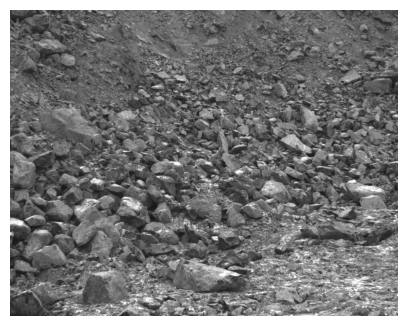

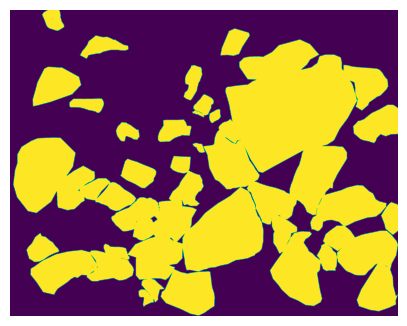

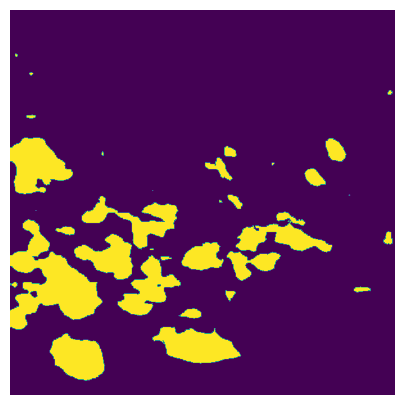

In [23]:
k = 2
img = PILImage.create(imges_names[k])
msk = PILMask.create(masks_names[k])
pred = learn.predict(PILImage.create(imges_names[k]))
show_image(img), show_image(msk), show_image(pred[0])